<a href="https://colab.research.google.com/github/Shiyue-wq/Codes_Record/blob/main/textual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


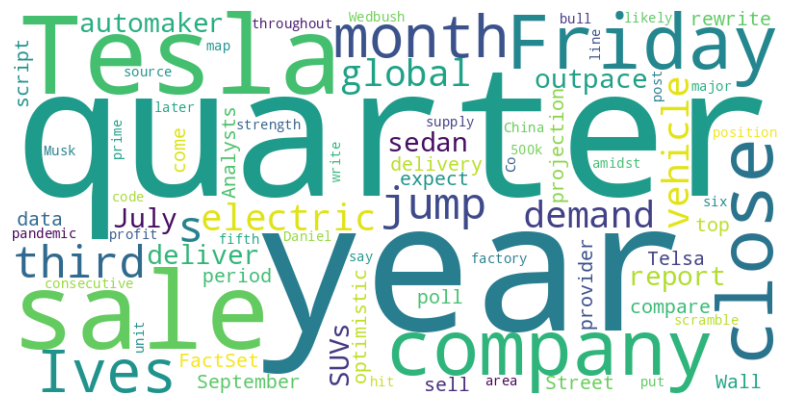

In [14]:
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def tag_trans(tag):
  if tag.startswith('J'):
    return "a"
  elif tag.startswith('V'):
    return "v"
  elif tag.startswith('R'):
    return "r"
  elif tag.startswith('N'):
    return "n"
  else:
    return None


def standarize(text):
  word_list = []
  text_list = word_tokenize(text)
  text_tag = nltk.pos_tag(text_list)
  for word, tag in text_tag:
      if word.lower() not in (stopWords and meaningless):
          word_tag = tag_trans(tag)
          if word_tag is not None:
              word_list.append(wordnet_lemmatizer.lemmatize(word, pos = word_tag))
          else:
              word_list.append(word)
  return word_list


wordnet_lemmatizer = WordNetLemmatizer()
te1 = """ Tesla‘s third-quarter sales jumped 44% as global demand for its electric vehicles outpaced that of most other automakers. The company reported Friday that it had delivered 139,000 SUVs and sedans from July through September, compared with 97,000 deliveries during the same period a year ago. The sales topped even some of the most optimistic projections coming from Wall Street. Analysts polled by data provider FactSet expected the company to sell closer to 137,000. Telsa has been rewriting the script throughout the year amidst a pandemic that has closed factories and scrambled supply lines. “This puts Musk & Co. in prime position to hit the area code of 500k units for the year which six months ago was not even on the map for the bulls,'" Daniel Ives of Wedbush wrote Friday. China was likely a major source of strength in the quarter, Ives said. Tesla could post its fifth consecutive quarter of profits later this month. """
te2 = """“On Tesla Inc's (NASDAQ:TSLA) second-quarter earnings call, CEO Elon Musk asked nickel miners to ramp up mining operations. Tesla will need a lot more nickel if the company's plan for the new 4680 battery is to come to market and be mass produced. Tesla will be using nickel in high performance and long-lasting batteries for electric vehicles. A report from Bloomberg reveals Tesla is in talks with BHP Group Ltd (NYSE:BHP) on a nickel deal to secure the supply needed for future plans. According to Bloomberg sources, the talks are currently stalled on pricing, with no clear end in sight. While nickel is a small portion of BHP's mining operations, these talks could signal BHP is looking to expand its nickel mining capabilities.”"""
dataset = [te1,te2]
stopWords = set(stopwords.words('english'))
meaningless = ['a','an','the','with','for','from','this','that','can''could','in','on','more','most','as',
                 'its','of','and','or','during','ago','even','by','to','been','which','was','it','has','had',
               ',','.','"',"'","'"]


#Q1
word_list = standarize(dataset[0])
cleand_word = " ".join(word_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleand_word)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()
plt.close()

In [47]:
@Q2
posi = pd.read_excel("/content/Havard_Dict_Positive.xlsx").iloc[:,0].values.tolist()
neg = pd.read_excel("/content/Havard_Dict_Negative.xlsx").iloc[:,0].values.tolist()
posi_senti = 0
neg_senti = 0
for i in word_list:
    if i.lower() in posi:
        posi_senti += 1
    elif i.lower() in neg:
        neg_senti += 1
news_sentiment = (posi_senti - neg_senti)/len(word_list)
print("Positive sentiments number:", posi_senti)
print("Negative sentiments number:", neg_senti)
print("The news sentiment variable using Harvard dictionary is", news_sentiment)

Positive sentiments number: 7
Negative sentiments number: 2
The news sentiment variable using Harvard dictionary is 0.049019607843137254


In [54]:
#Q3
from readability import Readability
r = Readability(te1)
fog = r.gunning_fog()
print("Fog index:",fog.score)

Fog index: 12.981446540880505


In [60]:
#Q4
word_list_compare = standarize(dataset[1])
word_cl_2 = " ".join(word_list_compare)
vectorizer = CountVectorizer()
compare = [cleand_word,word_cl_2]
freq_matrix = vectorizer.fit_transform(compare)
freq_array = freq_matrix.toarray()
cosine_sim = cosine_similarity(freq_matrix[0], freq_matrix[1])[0][0]
print("Final output array:\n", freq_array)
print("Cosine Similarity:", cosine_sim)

Final output array:
 [[3 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 2 1 1 1 2 1 1 1 0 1 1 0 1
  1 1 0 1 0 0 0 1 1 1 1 2 0 1 0 0 1 0 0 2 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0
  0 2 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 3 0 1 0 1 2 1
  1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 2 0 1 1 1 1 0 1 0 0 1 1 1 0 0
  1 3]
 [0 0 0 0 1 0 0 1 0 0 0 1 0 2 7 4 2 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0
  0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1
  2 0 1 1 2 1 6 1 0 1 2 0 0 0 0 1 0 2 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0
  0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 3 0 4 1 0 0 0 0 1 0 1 1 1 0 0 1 2
  0 0]]
Cosine Similarity: 0.12553487621293774


In [19]:
#Q5
tesla = "/content/FIN3210 Week 6 Tesla.xlsx"
df = pd.read_excel(tesla)
summary_stat = df[['Sentiment','Novelty','Impact']].describe()
correlation = df[['Sentiment','Novelty','Impact']].corr()
category_freq = df['Category'].value_counts().head(10)
category_fran = category_freq / len(df)
print("Summary statistics:\n", summary_stat,'\n')
print("Correlation:\n", correlation,'\n')
print("Top new categories'frequency", category_freq,'\n')
print("Top new categories'franction", category_fran,'\n')

Summary statistics:
          Sentiment      Novelty       Impact
count  1292.000000  1292.000000  1292.000000
mean     53.845975    28.877709    45.277864
std      14.824257    38.537946     9.996097
min       2.000000     0.000000    13.000000
25%      40.000000     0.000000    39.000000
50%      50.000000     3.000000    45.000000
75%      64.000000    56.000000    52.000000
max     100.000000   100.000000    77.000000 

Correlation:
            Sentiment   Novelty    Impact
Sentiment   1.000000  0.165557 -0.130972
Novelty     0.165557  1.000000 -0.064844
Impact     -0.130972 -0.064844  1.000000 

Top new categories'frequency Category
stock-loss                       409
stock-gain                       232
product-release                  111
business-contract                 63
capital-increase                  55
legal-verdict-favored             42
price-target-upgrade              40
fundraising                       33
acquisition-interest-acquirer     33
product-price-cut    